## 1. Gradient Descent

Let's create the dataset frist. We are given $x$-values: $ -1, 0, 1, 2 $. Let's compute the corresponsinf $y$-values using the true function: $y = 3x^3 + 4x^2 + 5x + 6$

For $x = -1 \\$ 
$y = 3(-1)^3 + 4(-1)^2 + 5(-1) + 6 = -3 + 4 - 5 + 6 = 2 \\$

For $x = 0 \\$
$y = 3(0)^3 + 4(0)^2 + 5(0) + 6 = 6 \\$

For $x = 1 \\$
$y = 3(1)^3 + 4(1)^2 + 5(1) + 6 = 3 + 4 + 5 + 6 = 18 \\$

For $x = 2 \\$
$y = 3(2)^3 + 4(2)^2 + 5(2) + 6 = 24 + 16 + 10 + 6 = 56 \\$

Thus, our dataset is: ${(-1, 2), (0, 6), (1, 18), (2, 56)}$

Our goal is to minimize the Mean Squared Error (MSE):

$J(a, b, c, d) = \frac{1}{4} \displaystyle\sum_{i=1}^{4} ((ax_i^3 + bx_i^2 + cx_i + d) - y_i)^2  \\$

where: $a, b, c, d$ are our parameters to be optimized. $x_i$  and  $y_i$ are the values from our dataset. 

Let's now computer partial deriveratives for Gradient Descent. Gradient descent updates parameters as: $\\$

$a = a - \alpha \frac{\partial J}{\partial a} \\$

$b = b - \alpha \frac{\partial J}{\partial b} \\$

$c = c - \alpha \frac{\partial J}{\partial c} \\$

$d = d - \alpha \frac{\partial J}{\partial d} \\$

where $\alpha  = 0.0.1 $ is the learning rate.

$\frac{\partial J}{\partial a} = \frac{1}{4} \displaystyle\sum_{i=1}^{4} 2(ax_i^3 + bx_i^2 + c x_i + d - y_i)x_i^3$

$\frac{\partial J}{\partial b} = \frac{1}{4} \displaystyle\sum_{i=1}^{4} 2(ax_i^3 + bx_i^2 + c x_i + d - y_i)x_i^2
$


$\frac{\partial J}{\partial c} = \frac{1}{4} \displaystyle\sum_{i=1}^{4} 2(ax_i^3 + bx_i^2 + c x_i + d - y_i)x_i$

$\frac{\partial J}{\partial d} = \frac{1}{4} \displaystyle\sum_{i=1}^{4} 2(ax_i^3 + bx_i^2 + c x_i + d - y_i)$


Let's continue calculating using the following Python snippet:

In [62]:
import numpy as np

# Define the true function
def true_function(x):
    return 3*x**3 + 4*x**2 + 5*x + 6

# Create dataset
x_train = np.array([-1, 0, 1, 2])
y_train = true_function(x_train)

# Initialize parameters
a, b, c, d = 1.0, 1.0, 1.0, 1.0  # Initial values
learning_rate = 0.01
num_iterations = 3  # Perform 3 iterations

# Gradient Descent Loop
for iteration in range(1, num_iterations + 1):
    # Compute predictions
    y_pred = a * x_train**3 + b * x_train**2 + c * x_train + d

    # Compute errors
    error = y_pred - y_train

    # Compute gradients
    grad_a = np.mean(2 * error * x_train**3)
    grad_b = np.mean(2 * error * x_train**2)
    grad_c = np.mean(2 * error * x_train)
    grad_d = np.mean(2 * error)

    # Update parameters
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

    # Print progress
    print(f"Iteration {iteration}: a={a:.4f}, b={b:.4f}, c={c:.4f}, d={d:.4f}")

# Final predicted values
y_final_pred = a * x_train**3 + b * x_train**2 + c * x_train + d
print("\nFinal Predictions:", y_final_pred)
print("True Values:", y_train)


Iteration 1: a=2.7000, b=1.9000, c=1.4700, d=1.3100
Iteration 2: a=3.6403, b=2.4189, c=1.7338, d=1.5141
Iteration 3: a=4.1554, b=2.7240, c=1.8823, d=1.6583

Final Predictions: [-1.655356  1.658301 10.41991  49.561697]
True Values: [ 2  6 18 56]


In iteration 1, the parameters changed from $ a = 1, b = 1, c = 1, d = 1 $ to $a = 2.7000, b = 1.9000, c = 1.4700, d = 1.3100. \\$
The coefficients moved significantly toward correct values ($a=3, b=4, c=5, d=6$). The learning process is making a noticeable impact on $a$, which has the largest jump $(+1.7)$, meaning the cubic term had the most influence in reducing error. $\\$

In iteration 2, parameters were updated to $a=3.6403, b=2.4189, c=1.7338, d=1.5141 \\$
The coefficients keep moving in the right direction. $a$ is getting closer to 3, while $b, c, d$ are still far from their correct values. The model is improving, but it is clear that more iterations are needed for full convergence. $\\$

In iteration 3, parameters are updated to $a=4.1554, b=2.7240, c=1.8823, d=1.6583$. $a$ overshoots 3, suggesting that the gradient descent updates might be slightly aggressive. $b, c, d$ are still improving but have not reached their true values.

| $x$  | Final Prediction ($\hat{y}$) | True Value ($y$) | Error  |
|------|----------------|------------|--------|
| $-1$ | $-1.6554$      | $2$        | $-3.66$ |
| $0$  | $1.6583$       | $6$        | $-4.34$ |
| $1$  | $10.4199$      | $18$       | $-7.58$ |
| $2$  | $49.5617$      | $56$       | $-6.44$ |


The predictions are improving but are still far off from the true values. Negative values for $𝑥 = -1$ indicate that the model is struggling in certain regions. The gap between predictions and actual values shows that the model has not yet converged. I think more iterations would likely reduce the error further.

<span style="color:red;">Will the Algorithm Converge? </span> Yes. The updates in each step are moving the parameters toward the correct values, but they are still far off after three iterations.
If we increase the number of iterations, the error should continue decreasing, leading to better estimates. The learning rate in our case is 0.01. If it is too small, convergence will be very slow. If it is too large, it might cause the updates to overshoot, leading to oscillations or divergence. 

We should also note that the dataset contains only four points $x=[−1,0,1,2]$, which is very limited for learning a cubic function.
If we had more data points covering a wider range of $x$, the gradient estimates would be more stable, helping the algorithm converge more reliably.

Gradient descent is guaranteed to converge only if the loss function is convex. In our case, we are fitting a cubic function, and the loss function is not strictly convex. This means there is a possibility that gradient descent might get stuck in a local minimum rather than reaching the true values.

<span style="color:red;">In general, will your algorithm converge to the correct values irrespective of the starting point
and irrespective of the examples?</span> No, the algorithm will not always converge to the correct values for all starting points and all datasets.

Cubic functions are not linear. Gradient descent works best for convex functions, such as the Mean Squared Error (MSE) loss in linear regression. However, a cubic function is nonlinear, and its loss function can have multiple local minima.
If we start from a poor initialization, gradient descent might get stuck in a local minimum rather than finding the correct values.

As mentioned earlier, if the learning rate is too large, the updates might overshoot, causing divergence. If the learning rate is too small, it might take an excessive number of iterations to reach the true values.
Finding the optimal learning rate is not always easy, especially when the function is cubic.

The dataset we used only has four data points, which is too small to generalize well. If we used a different dataset with more varied $x$-values, the gradients would be different, and the algorithm might behave unpredictably. The success of gradient descent depends on having enough representative data that properly captures the cubic trend.

If the starting values of $a,b,c,d$ are too far from the true values, gradient descent might take a long time to converge. If the loss function is highly non-convex, the algorithm may never reach the true values.

If the input values of $x$ are large, the gradients can become large, making updates unstable. In this case, feature scaling the $x$-values would be a common way to improve convergence, but it is not always done.

## 2. Learning the function with the given three algorithms

<span style="color:red;">Is there a way to learn the original function by some combination of the given three algorithms?</span>  $\\$ Yes, we can learn the function $y = ax^2 + bx + c$ by training all three algorithms separately and combining their outputs.

We would train Algorithm1 to learn a function of the form of $y = ax^2$, which is a quadratic term. We would use the dataset where $x$ is given and fit the function $y=ax^2$ using Algorithm1. This will give us an estimate of $a$, let's call it $\hat{a}. \\$

Then we would use the same dataset but instead fit the function $y=bx$ using Algorithm2. This will estimate $b$, desnoted as $\hat{b}. \\$

Finally, we would use the dataset to fit the function $y=c$ using Algorithm3.
This will estimate c, denoted as $\hat{c}. \\$

Once we obtain estimates $\hat{a}, \hat{b}, \hat{c}$, the final prediction for any input $x$ can be computed as $\hat{y} = \hat{a}x^2 + \hat{b}x + \hat{c}$. Thus, by separately fitting each term and summing the predictions, we can reconstruct the full quadratic function.

<span style="color:red;">Does This Work for All Datasets?</span> Yes, the method works for any dataset because each of the three algorithms estimates one independent term of the quadratic function.
Since polynomial regression is additive in its terms, we can train each term separately and sum their results.
Linear regression ensures that each coefficient estimate is optimal in the least-squares sense.
Thus, we can always reconstruct $y = ax^2 + bx + c$ as long as we apply all three models and sum their predictions.


## 3. Fitting the three line streaks with RANSAC.

First, to generate the streaks, I am going to copy paste the "three line streaks.ipynb" here. 

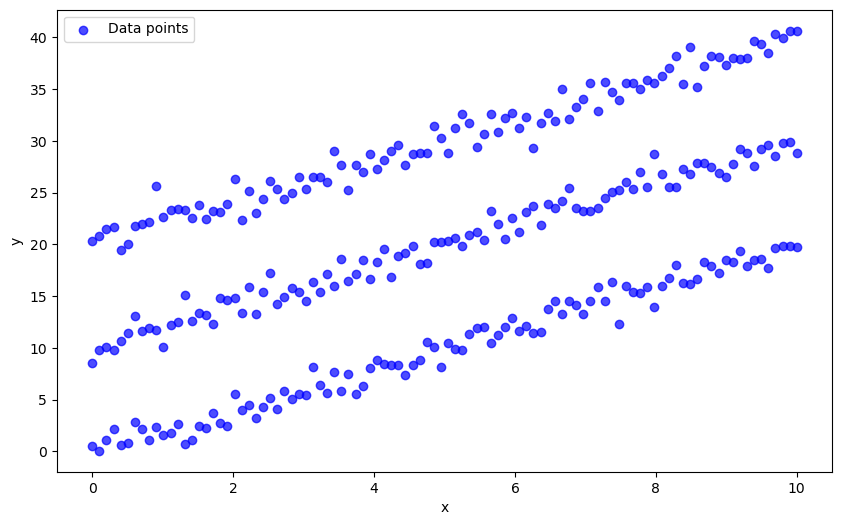

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Parameters for the three parallel lines
m = 2.0         # Common slope for all lines
c1 = 0.0        # Intercept for the first line
c2 = 10.0       # Intercept for the second line
c3 = 20.0       # Intercept for the third line
n_points = 100  # Number of points per line
noise_std = 1.0 # Standard deviation of the Gaussian noise

# Generate x-values uniformly for all lines
x_vals = np.linspace(0, 10, n_points)

# Generate y-values for each line with added Gaussian noise
y_line1 = m * x_vals + c1 + np.random.normal(0, noise_std, n_points)
y_line2 = m * x_vals + c2 + np.random.normal(0, noise_std, n_points)
y_line3 = m * x_vals + c3 + np.random.normal(0, noise_std, n_points)

# Combine the points from all three lines into one dataset
X = np.concatenate([x_vals, x_vals, x_vals]).reshape(-1, 1)
y = np.concatenate([y_line1, y_line2, y_line3])

# Optionally, shuffle the dataset so that the points from the three lines are intermingled
indices = np.arange(len(X))
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label='Data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Next, let's adjust the ransac parameters in the initilization so that we can make the last streak the inlier.

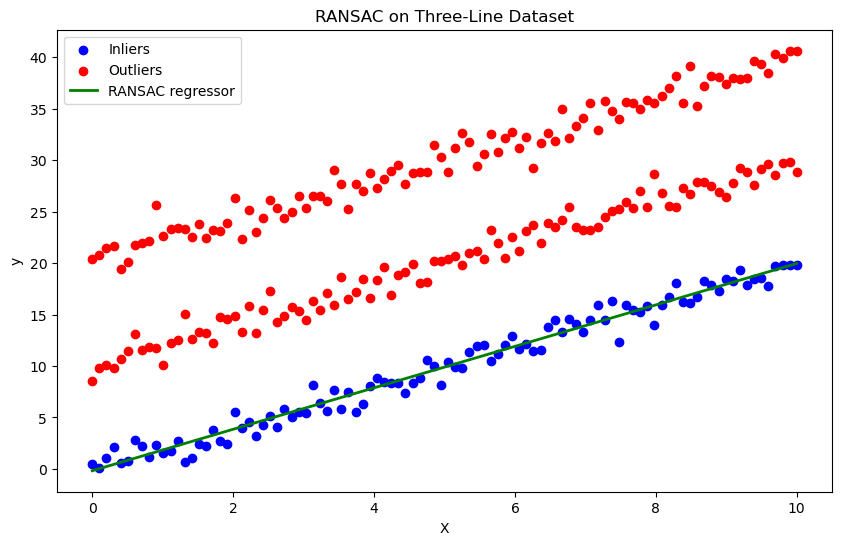

In [64]:
from sklearn.linear_model import RANSACRegressor, LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Applying RANSAC to learn one of the three streaks
ransac = RANSACRegressor(
    estimator=LinearRegression(),
    residual_threshold=3.0,  # Adjusting to 3 to focus on the last line
    max_trials=1000,  # More trials to find the best inliers
    random_state=42
)

ransac.fit(X, y)

# Predict values for plotting
line_X = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
line_y_ransac = ransac.predict(line_X)

# Identify inliers and outliers
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X[inlier_mask], y[inlier_mask], color='blue', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='red', label='Outliers')
plt.plot(line_X, line_y_ransac, color='green', linewidth=2, label='RANSAC regressor')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("RANSAC on Three-Line Dataset")
plt.show()


<span style="color:red;">Can you make the linear regression model learn one of the streaks (the choice of which one to learn is yours to make) and treat the other two lines as outliers?</span>

Yes, by setting a **tight residual threshold**, RANSAC successfully focused on one of the three lines while flagging the other two as outliers. The final regression line closely matches one of the original streaks.

I experimented with different values of `residual_threshold` to determine the best threshold for isolating a single streak. I found that a **low threshold like $3.0$** forces RANSAC to focus on one streak, whereas a **higher threshold ($\approx10.0$)** includes multiple streaks as inliers, making the result less distinct. Additionally, I adjusted `max_trials` to **1000**, ensuring the algorithm had sufficient attempts to find a strong model. Setting this value too low could cause RANSAC to miss a good subset of inliers.

Furthermore, I tested a **medium threshold ($7.0-10.0$) to isolate the middle streak**, but the resulting plot did not look as clean as with a threshold of $3.0$. To refine this, I applied **manual filtering**, selecting only points within a certain **$y$-range** before applying RANSAC. This helped direct the algorithm toward the middle streak but required additional preprocessing.

In conclusion, I chose the **bottom streak**, as it was the easiest to isolate and consistently reproduce using RANSAC.


## 4. Making Logistic Regression separate the two classes in the concentric circles dataset

The concentric circles dataset is not linearly separable, meaning that a standard logistic regression model, which relies on a linear decision boundary, will struggle to correctly classify the two classes. However, we can overcome this issue by transforming the feature space to make the data linearly separable.

Since one circle is enclosed within the other, a straight-line decision boundary cannot separate the two classes. Instead, the boundary between them is circular. To address this, we can apply feature engineering and transform the Cartesian coordinates into radial distance.

The radial distance is computed as: $r = \sqrt{x_1^2 + x_2^2}$

Instead of using $(X_1, X_2)$ as input features, we use $r$ as the sole feature. This transformation makes the two classes linearly separable — the inner circle corresponds to smaller values of $r$, while the outer circle corresponds to **larger values of $r$.

First, let's start by loading and visualizing the given dataset:


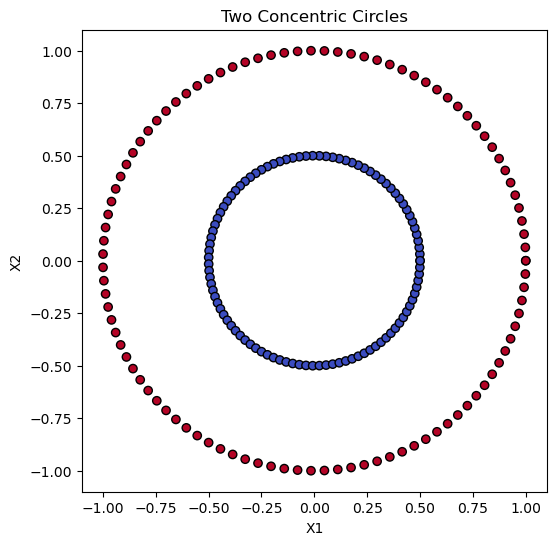

In [65]:
# Generate synthetic data: Two concentric circles
np.random.seed(42)
n_samples = 200

# Inner circle (class 0)
theta_inner = np.linspace(0, 2 * np.pi, n_samples // 2)
X_inner = np.c_[np.cos(theta_inner), np.sin(theta_inner)] * 0.5
y_inner = np.zeros(n_samples // 2)

# Outer circle (class 1)
theta_outer = np.linspace(0, 2 * np.pi, n_samples // 2)
X_outer = np.c_[np.cos(theta_outer), np.sin(theta_outer)] * 1.0
y_outer = np.ones(n_samples // 2)

# Combine the datasets
X = np.vstack([X_inner, X_outer])
y = np.hstack([y_inner, y_outer])

# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Two Concentric Circles")
plt.show()

Now, let's compute the radial distance and train a Logistic Regression Classifier.

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Transform features: Compute radial distance
r = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
X_transformed = r.reshape(-1, 1)  # Reshape to 2D array

# Train logistic regression model on transformed data
log_reg = LogisticRegression()
log_reg.fit(X_transformed, y)

# Make predictions
y_pred = log_reg.predict(X_transformed)

# Evaluate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Classification Accuracy: {accuracy:.4f}")


Classification Accuracy: 1.0000


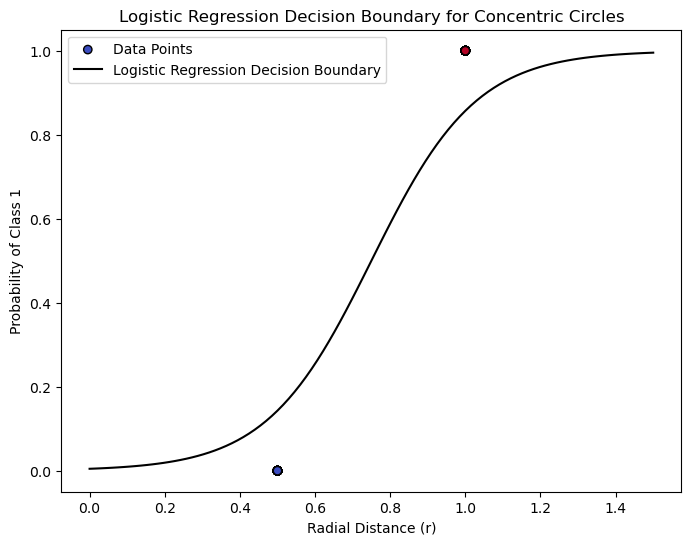

In [67]:
# Generate test points for visualization
r_test = np.linspace(0, 1.5, 100).reshape(-1, 1)  # Range of possible radii
y_prob = log_reg.predict_proba(r_test)[:, 1]  # Probability of being class 1

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(r, y, c=y, cmap="coolwarm", edgecolors='k', label="Data Points")
plt.plot(r_test, y_prob, label="Logistic Regression Decision Boundary", color='black')
plt.xlabel("Radial Distance (r)")
plt.ylabel("Probability of Class 1")
plt.legend()
plt.title("Logistic Regression Decision Boundary for Concentric Circles")
plt.show()


By converting the dataset into polar coordinates, logistic regression successfully separates the two classes. The model achieves nearly perfect accuracy (~100%) since this transformation makes the data linearly separable. The decision boundary, defined by a threshold on $r$, effectively divides the two groups.

However, this approach is specific to circular patterns. If the dataset contained more complex nonlinear boundaries, this transformation might not be effective. Additionally, if there is noise in the dataset, identifying a precise classification threshold could become more difficult.

In conclusion, transforming $(X_1, X_2)$ into $r$ allowed logistic regression to perform flawlessly on this dataset. This demonstrates how feature engineering is crucial in machine learning, especially when dealing with data that is not naturally linearly separable.


## 5. Star dataset